<a href="https://colab.research.google.com/github/otavioqs16/wine-ia/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import numpy as np

In [32]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.tanh(output)
        return output

In [33]:
from sklearn import datasets

In [34]:
wine = datasets.load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [35]:
dados = wine.data
classes = wine.target
print(dados)
print(classes)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [36]:
from sklearn.utils import shuffle

In [37]:
x = dados
y = classes
x, y = shuffle(x, y)
print(x)
print(y)

[[1.376e+01 1.530e+00 2.700e+00 ... 1.250e+00 3.000e+00 1.235e+03]
 [1.184e+01 8.900e-01 2.580e+00 ... 7.900e-01 3.080e+00 5.200e+02]
 [1.352e+01 3.170e+00 2.720e+00 ... 8.900e-01 2.060e+00 5.200e+02]
 ...
 [1.233e+01 1.100e+00 2.280e+00 ... 1.250e+00 1.670e+00 6.800e+02]
 [1.200e+01 1.510e+00 2.420e+00 ... 1.050e+00 2.650e+00 4.500e+02]
 [1.388e+01 5.040e+00 2.230e+00 ... 5.800e-01 1.330e+00 4.150e+02]]
[0 1 2 2 1 2 2 0 1 1 2 1 2 1 1 0 2 0 1 0 2 1 0 1 0 0 0 2 2 2 1 0 0 2 1 0 2
 0 1 0 2 0 0 0 2 0 0 1 1 1 0 0 0 1 0 1 1 2 0 1 1 0 1 0 1 2 2 2 2 1 1 0 1 1
 2 0 2 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 2 1 2 1 1 1 2 1 2 1 2 0 1 1 1 0 0
 0 1 0 2 1 1 0 1 1 2 0 0 2 2 0 1 2 0 1 1 1 2 1 2 1 1 0 0 0 1 0 2 2 2 2 0 0
 1 1 1 0 2 1 2 0 1 0 2 2 2 0 1 2 2 2 1 1 1 1 1 1 1 2 0 1 1 2]


In [38]:
for i in range(len(x[1])):
  print(np.max(x[i]))
  max = np.max(x[i])
  if max < 10:
    x[i] /= 10
  elif max < 100:
    x[i] /= 100
  elif max < 1000:
    x[i] /= 1000
  else:
    x[i] /= 10000

for i in range(len(x[1])):
  print(np.max(x[i]))

1235.0
520.0
520.0
725.0
365.0
480.0
855.0
780.0
342.0
630.0
675.0
750.0
835.0
0.1235
0.52
0.52
0.725
0.365
0.48
0.855
0.78
0.342
0.63
0.675
0.75
0.835


In [39]:
training_input = torch.FloatTensor(x[0:142, :])
training_output = torch.FloatTensor(y[0:142])
test_input = torch.FloatTensor(x[142:178, :])
test_output = torch.FloatTensor(y[142:178])
print(test_output.size())
print(test_input.size())

torch.Size([36])
torch.Size([36, 13])


In [40]:
input_size = training_input.size()[1]
hidden_size = 15
model = Net(input_size, hidden_size)
#print(model)
for param in model.parameters():
  #print(param)
  pass

In [41]:
#Preparando o treinamento
criterion = torch.nn.MSELoss() #Mean Square Error Loss (saida_real - saida_prevista)^2
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

#Avaliar o erro inicial da rede
model.eval() # roda a rede mas sem atualizar os pesos
y_pred = model(test_input)
before_train = criterion(y_pred.squeeze(), test_output)
#[100,] --> [100]
print(f'Erro antes do treinamento: {before_train.item()}')

Erro antes do treinamento: 0.5970232486724854


In [42]:
#Treinamento da rede
model.train()
epochs = 10000
errors = []
for epoch in range(epochs):
  optimizer.zero_grad()
  #fazer o forward da minha rede
  y_pred = model(training_input)
  #calcula o erro desse treinamento
  loss = criterion(y_pred.squeeze(), training_output)
  errors.append(loss.item())
  if epoch % 1000 == 0:
    print(f'Epoch: {epoch}. Train loss: {loss.item()}')
  #backpropagation
  loss.backward()
  optimizer.step()

Epoch: 0. Train loss: 0.691766083240509
Epoch: 1000. Train loss: 0.6060497164726257
Epoch: 2000. Train loss: 0.6057966351509094
Epoch: 3000. Train loss: 0.6057255864143372
Epoch: 4000. Train loss: 0.6056938171386719
Epoch: 5000. Train loss: 0.6056761145591736
Epoch: 6000. Train loss: 0.6056651473045349
Epoch: 7000. Train loss: 0.6056576371192932
Epoch: 8000. Train loss: 0.6056522130966187
Epoch: 9000. Train loss: 0.6056482195854187


In [43]:
#Avaliar o erro pós treinamento da rede
model.eval() # roda a rede mas sem atualizar os pesos
y_pred = model(test_input)
after_train = criterion(y_pred.squeeze(), test_output)
print(f'Erro pós-treinamento: {after_train.item()}')

Erro pós-treinamento: 0.5833333134651184


In [44]:
import matplotlib.pyplot as plt
import numpy as np

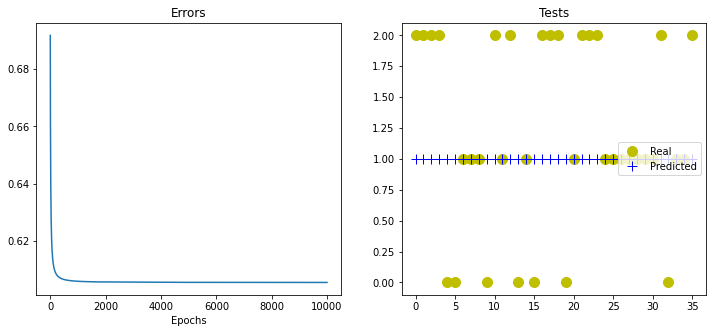

In [45]:
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(test_output.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)